### install extra library

In [1]:
!pip install networkx

### read Web Scraping Amazon from DataPlatform

In [2]:
from dsmlibrary.datanode import DataNode
from tqdm.auto import tqdm

In [3]:
datanode = DataNode()

Init DataNode sucessful!


In [4]:
dir_process_id = 77

In [23]:
df = datanode.read_df(datanode.get_file_id(directory_id=dir_process_id, name="01-Amazon.parquet"))
df

,Title,Rating,ReviewCount,Url
0,HOLI Freeze Dried Salmon Dog Food Topper - wit...,4.3,206,https://amazon.com/sspa/click?ie=UTF8&spc=MToy...
1,Blue Buffalo Life Protection Formula Natural A...,4.7,"21,746",https://amazon.com/Blue-Buffalo-Protection-For...
2,Purina Pro Plan High Protein Dog Food With Pro...,4.7,"16,618",https://amazon.com/Purina-Pro-Plan-Shredded-Ch...
3,"Purina ONE Natural Dry Dog Food, SmartBlend La...",4.7,"13,205",https://amazon.com/Purina-Smartblend-Natural-F...
4,"Royal Canin Small Breed Adult Dry Dog Food, 14...",4.8,"9,704",https://amazon.com/Royal-Canin-Health-Nutritio...
...,...,...,...,...
645,Purina ONE SmartBlend Natural Healthy Weight F...,4.7,"13,596",https://amazon.com/Purina-Smartblend-Natural-H...
646,Wellness Complete Health Dry Dog Food with Gra...,4.6,"7,197",https://amazon.com/Wellness-Complete-Natural-F...
647,VICTOR Super Premium Dog Food – Hi-Pro Plus Dr...,4.7,"9,447",https://amazon.com/VICTOR-Super-Premium-Dog-Fo...
648,Blue Buffalo Life Protection Formula Natural S...,4.7,"8,334",https://amazon.com/Blue-Buffalo-Protection-For...


### prepair graph data

In [24]:
graph_data = [(elm.get('Title'), elm.get('ReviewCount')) for elm in df.to_dict('records')]
graph_data

[('HOLI Freeze Dried Salmon Dog Food Topper - with Omega 3 & 6 - Single Ingredient, Human-Grade Wild Ca',
  '206'),
 ('Blue Buffalo Life Protection Formula Natural Adult Dry Dog Food, Chicken and Brown Rice 30-lb',
  '21,746'),
 ('Purina Pro Plan High Protein Dog Food With Probiotics for Dogs, Shredded Blend Chicken & Rice Formul',
  '16,618'),
 ('Purina ONE Natural Dry Dog Food, SmartBlend Lamb & Rice Formula - 31.1 lb. Bag',
  '13,205'),
 ('Royal Canin Small Breed Adult Dry Dog Food, 14 lb bag', '9,704'),
 ('Purina ONE Natural Dry Dog Food, SmartBlend Chicken & Rice Formula - 31.1 lb. Bag',
  '22,273'),
 ('Blue Buffalo Life Protection Formula Natural Adult Small Breed Dry Dog Food, Chicken and Brown Rice ',
  '12,656'),
 ('Blue Buffalo Homestyle Recipe Natural Senior Wet Dog Food, Chicken 12.5-oz can (Pack of 12)',
  '6,434'),
 ('Blue Buffalo Life Protection Formula Natural Adult Healthy Weight Dry Dog Food, Chicken and Brown Ri',
  '4,972'),
 ('Purina Friskies Gravy Wet Cat Food Var

In [25]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx

In [26]:
output_notebook()

Loading BokehJS ...

In [27]:
titles = {elm:'name' for elm in list(df['Title'].unique())}
titles

{'HOLI Freeze Dried Salmon Dog Food Topper - with Omega 3 & 6 - Single Ingredient, Human-Grade Wild Ca': 'name',
 'Blue Buffalo Life Protection Formula Natural Adult Dry Dog Food, Chicken and Brown Rice 30-lb': 'name',
 'Purina Pro Plan High Protein Dog Food With Probiotics for Dogs, Shredded Blend Chicken & Rice Formul': 'name',
 'Purina ONE Natural Dry Dog Food, SmartBlend Lamb & Rice Formula - 31.1 lb. Bag': 'name',
 'Royal Canin Small Breed Adult Dry Dog Food, 14 lb bag': 'name',
 'Purina ONE Natural Dry Dog Food, SmartBlend Chicken & Rice Formula - 31.1 lb. Bag': 'name',
 'Blue Buffalo Life Protection Formula Natural Adult Small Breed Dry Dog Food, Chicken and Brown Rice ': 'name',
 'Blue Buffalo Homestyle Recipe Natural Senior Wet Dog Food, Chicken 12.5-oz can (Pack of 12)': 'name',
 'Blue Buffalo Life Protection Formula Natural Adult Healthy Weight Dry Dog Food, Chicken and Brown Ri': 'name',
 'Purina Friskies Gravy Wet Cat Food Variety Pack, Tasty Treasures Prime Filets - (24) 

In [28]:
G = nx.Graph(graph_data)
G

In [29]:
node_colors = {elm:'skyblue' if elm in titles else 'yellow' for elm in G.nodes()}
node_colors

{'HOLI Freeze Dried Salmon Dog Food Topper - with Omega 3 & 6 - Single Ingredient, Human-Grade Wild Ca': 'skyblue',
 '206': 'yellow',
 'Blue Buffalo Life Protection Formula Natural Adult Dry Dog Food, Chicken and Brown Rice 30-lb': 'skyblue',
 '21,746': 'yellow',
 'Purina Pro Plan High Protein Dog Food With Probiotics for Dogs, Shredded Blend Chicken & Rice Formul': 'skyblue',
 '16,618': 'yellow',
 'Purina ONE Natural Dry Dog Food, SmartBlend Lamb & Rice Formula - 31.1 lb. Bag': 'skyblue',
 '13,205': 'yellow',
 'Royal Canin Small Breed Adult Dry Dog Food, 14 lb bag': 'skyblue',
 '9,704': 'yellow',
 'Purina ONE Natural Dry Dog Food, SmartBlend Chicken & Rice Formula - 31.1 lb. Bag': 'skyblue',
 '22,273': 'yellow',
 'Blue Buffalo Life Protection Formula Natural Adult Small Breed Dry Dog Food, Chicken and Brown Rice ': 'skyblue',
 '12,656': 'yellow',
 'Blue Buffalo Homestyle Recipe Natural Senior Wet Dog Food, Chicken 12.5-oz can (Pack of 12)': 'skyblue',
 '6,434': 'yellow',
 'Blue Buffal

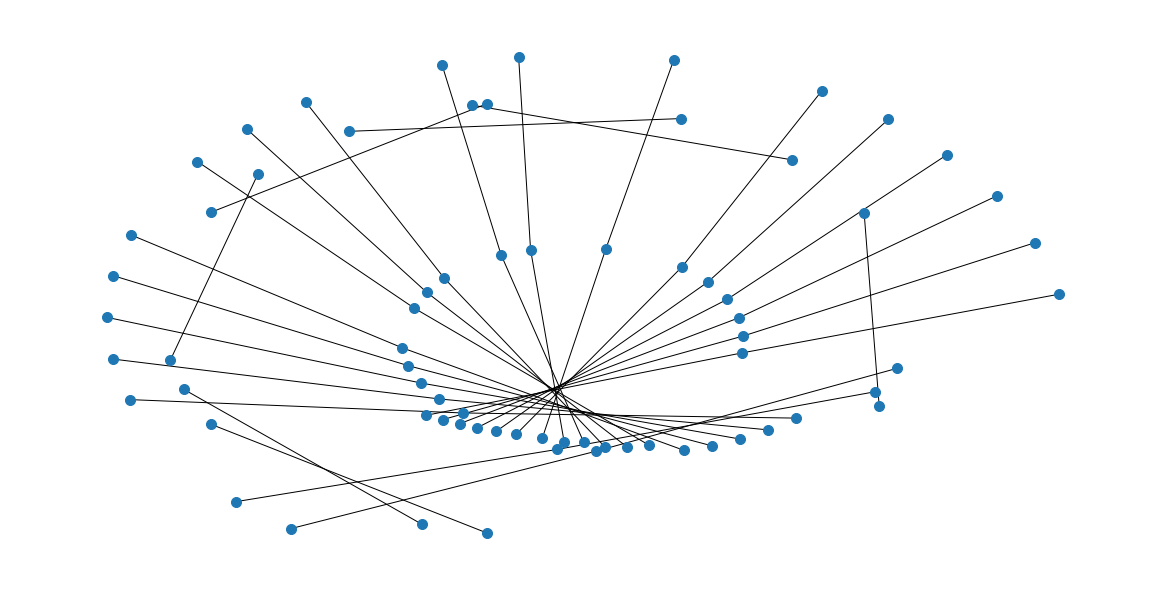

In [30]:
plt.figure(figsize=(16,8))
nx.draw_kamada_kawai(G, node_size=100)
plt.show()

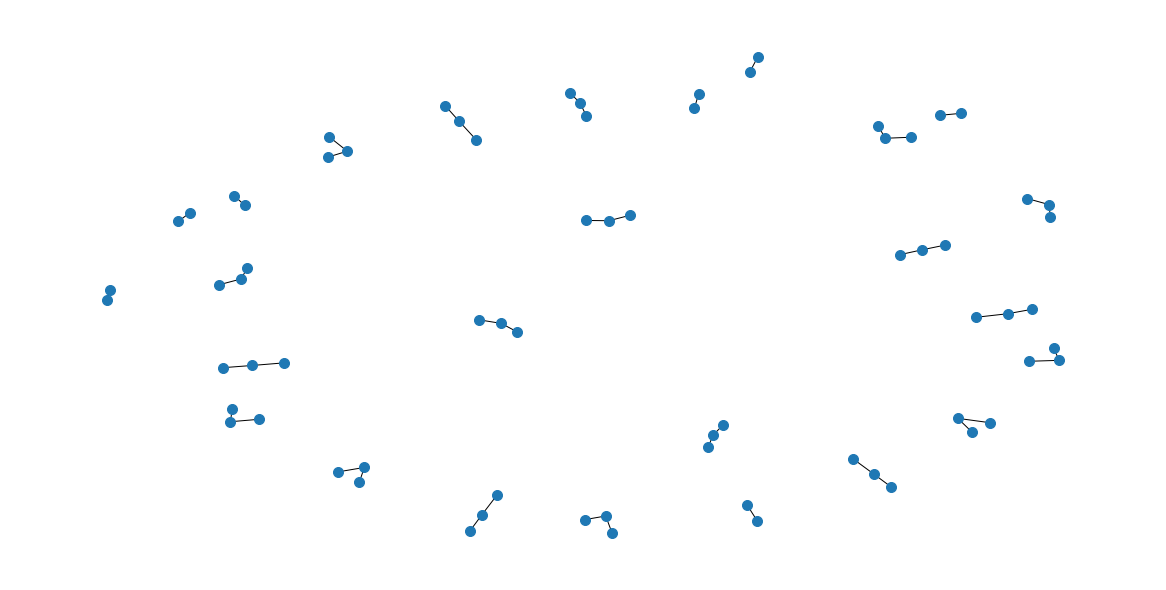

In [31]:
plt.figure(figsize=(16,8))
nx.draw_spring(G, node_size=100)
plt.show()

### visualize raw data

In [32]:
title = "Product ReviewCount"
HOVER_TOOLTIPS = [("Character", "@index")]
nx.set_node_attributes(G, node_colors, 'node_colors')
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset,hover", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title,
              frame_width=1200, frame_height=800
 )

network_graph = from_networkx(G, nx.kamada_kawai_layout, scale=10, center=(0, 0))
network_graph.node_renderer.glyph = Circle(size=15, fill_color='node_colors')
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)
plot.renderers.append(network_graph)
show(plot)

### Compute betweenness_centrality graph

In [33]:
def cal_size(val, k=10, k2=1000):
    val = val * k * k2
    if val > k: 
        return val
    return k

In [34]:
graph_values = nx.centrality.betweenness.betweenness_centrality(G)
node_size = {k:cal_size(v, k=10, k2=1000) for k,v in graph_values.items()}

In [35]:
title = "betweenness_centrality"
HOVER_TOOLTIPS = [("Character", "@index")]

nx.set_node_attributes(G, node_size, 'node_size')
nx.set_node_attributes(G, node_colors, 'node_colors')

plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset,hover", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title,
              frame_width=1200, frame_height=800
)

network_graph = from_networkx(G, nx.kamada_kawai_layout, scale=10, center=(0, 0))
network_graph.node_renderer.glyph = Circle(fill_color='node_colors', size='node_size')
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)
plot.renderers.append(network_graph)
show(plot)

### compute eigenvector_centrality

In [36]:
graph_values = nx.centrality.eigenvector.eigenvector_centrality(G, max_iter=600)
node_size = {k:cal_size(v, k=10, k2=15) for k,v in graph_values.items()}

In [37]:
title = "xxx"
HOVER_TOOLTIPS = [("Character", "@index")]

nx.set_node_attributes(G, node_size, 'node_size') 
nx.set_node_attributes(G, node_colors, 'node_colors')

plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset,hover", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title,
              frame_width=1200, frame_height=800
)

network_graph = from_networkx(G, nx.kamada_kawai_layout, scale=10, center=(0, 0))
network_graph.node_renderer.glyph = Circle(fill_color='node_colors', size='node_size')
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)
plot.renderers.append(network_graph)
show(plot)